In [ ]:
! pip install NeuroGraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 96.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 17.8 MB/s eta 0:00:00


In [ ]:
! pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.8 MB/s eta 0:00:00


In [ ]:
! pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 94.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
! pip install imbalanced-learn

In [ ]:
import argparse
import sklearn
import torch
import torch.nn.functional as F
from torch.optim import Adam
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from torch_geometric.loader import DataLoader
import os,random
import os.path as osp
import sys
import time
from torchmetrics.classification import BinaryF1Score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

In [ ]:
import torch
from torch.nn import Linear
from torch import nn
from torch_geometric.nn import global_max_pool, TopKPooling, global_mean_pool
from torch_geometric.nn import aggr, TopKPooling, SAGPooling, ASAPooling, EdgePooling
import torch.nn.functional as F
from torch_geometric.nn import APPNP, MLP, GCNConv, GINConv, SAGEConv, GraphConv, TransformerConv, ChebConv, GATConv, SGConv, GeneralConv
from torch.nn import Conv1d, MaxPool1d, ModuleList
import random
import math
from torch_geometric.nn import global_add_pool, global_mean_pool
softmax = torch.nn.LogSoftmax(dim=1)
import matplotlib.pyplot as plt
import numpy as np
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/shayan/thesis_project/dataset_neurograph')

In [ ]:
from datasets import NeuroGraphDataset

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument('--dataset', type=str, default='HCPActivity')
parser.add_argument('--device', type=str, default='cuda')
parser.add_argument('--seed', type=int, default=123)
parser.add_argument('--model', type=str, default="GCNConv")
parser.add_argument('--hidden', type=int, default=32)
parser.add_argument('--hidden_mlp', type=int, default=64)
parser.add_argument('--num_layers', type=int, default=7)
parser.add_argument('--epochs', type=int, default=100)
parser.add_argument('--echo_epoch', type=int, default=50)
parser.add_argument('--batch_size', type=int, default=16)
parser.add_argument('--early_stopping', type=int, default=50)
parser.add_argument('--lr', type=float, default=1e-5)
parser.add_argument('--weight_decay', type=float, default=0.0005)
parser.add_argument('--dropout', type=float, default=0.5)
parser.add_argument('--pooling_code', type=str, default='0000000')
parser.add_argument('--pooling_type', type=str, default="TopKPooling")

_StoreAction(option_strings=['--pooling_type'], dest='pooling_type', nargs=None, const=None, default='TopKPooling', type=<class 'str'>, choices=None, required=False, help=None, metavar=None)

# Early Stopping


In [ ]:
import numpy as np
import torch

class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement.
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model, path):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model, path)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model, path)
            self.counter = 0

    def save_checkpoint(self, val_loss, model, path):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), path)
        self.val_loss_min = val_loss



# Set parameter


In [ ]:
num_layer_list = [3, 5, 7, 9]
pooling_code_list = [['000', '010', '111'], ['00000', '00100', '01010', '11111'], ['0000000', '0001000', '0101010', '1111111'], ['000000000', '000010000', '010101010', '111111111']]
model_type_list = ['GCNConv', 'GINConv', 'GATConv']
pooling_type_list = [("TopKPooling", 0.8), ("TopKPooling", 0.6), 'dense_diff_pool', 'ASAPooling']
dataset_list = ['HCPGender']

In [ ]:
# for test
num_layer_list = [9]
pooling_code_list = [['010101010']]
model_type_list = ['GCNConv']
pooling_type_list = [("TopKPooling", 0.8), ("TopKPooling", 0.5)]
dataset_list = ['HCPActivity']

In [ ]:
import sys
sys.argv=['']
del sys

In [ ]:
args = parser.parse_args()
path = "base_params/"
res_path = "results/"
root = "data/"
if not os.path.isdir(path):
    os.mkdir(path)
if not os.path.isdir(res_path):
    os.mkdir(res_path)
def logger(info):
    f = open(os.path.join(res_path, 'results_new.csv'), 'a')
    print(info, file=f)

In [ ]:
torch.manual_seed(args.seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(args.seed)
random.seed(args.seed)
np.random.seed(args.seed)

In [ ]:
dataset = NeuroGraphDataset(root=root, name = args.dataset)
print(dataset.num_classes)
print(len(dataset))

print("dataset loaded successfully!",args.dataset)

Extracting data/HCPActivity/raw/b4g59ibn8itegr0rpcd16m9ajb2qyddf.zip
Processing...
Done!


7
7443
dataset loaded successfully! HCPActivity


In [ ]:
import csv
def create_csv_main(file_path):
  # Column labels
  column_labels = ['Model_Name', 'Type_of_Pooling', 'Num_of_Conv', 'Name_of_Dataset',
                   'Pooling_Code', 'train_Loss', 'test_Precision', 'test_Recall', 'test_f1_score', 'val_acc', 'test_acc', 'test_loss', 'val_loss', 'hidden_channels']




  # Open the CSV file in write mode
  with open(file_path, 'w', newline='') as csvfile:
      # Create a CSV writer object
      csv_writer = csv.writer(csvfile)

      # Write column labels to the CSV file
      csv_writer.writerow(column_labels)


  print("Data has been written to", file_path)

file_path_csv = '/content/drive/MyDrive/shayan/thesis_project/results/csv_result/csv_final_result.csv'
create_csv_main(file_path_csv)


Uncomment this section for Undersampling

In [ ]:

# # Step 1: Calculate class distribution
# unique_classes, class_counts = np.unique(dataset.y, return_counts=True)
# print(unique_classes, class_counts)
# min_count = np.min(class_counts)  # Step 2: Find the minority class size
# print(min_count)

# # Step 3: Sample indices for each class to match the minority class size
# undersampled_indices = np.array([], dtype=int)
# for class_id in unique_classes:
#     class_indices = np.where(dataset.y == class_id)[0]
#     if class_id != 0:
#       min_count = 369
#     else:
#       min_count = 225
#     undersampled_class_indices = np.random.choice(class_indices, size=min_count, replace=False)
#     undersampled_indices = np.concatenate((undersampled_indices, undersampled_class_indices))

# # Shuffle the undersampled_indices to mix up class order
# np.random.shuffle(undersampled_indices)

# # Step 4: Create a new balanced dataset
# dataset = dataset[undersampled_indices]



In [ ]:
dataset.x.shape

torch.Size([2977200, 400])

In [ ]:
labels = [d.y.item() for d in dataset]

train_tmp, test_indices = train_test_split(list(range(len(labels))),
                        test_size=0.2, stratify=labels,random_state=123,shuffle= True)
tmp = dataset[train_tmp]
train_labels = [d.y.item() for d in tmp]
train_indices, val_indices = train_test_split(list(range(len(train_labels))),
 test_size=0.125, stratify=train_labels,random_state=123,shuffle = True)
train_dataset = tmp[train_indices]
val_dataset = tmp[val_indices]
test_dataset = dataset[test_indices]
print("dataset {} loaded with train {} val {} test {} splits".format(args.dataset,len(train_dataset), len(val_dataset), len(test_dataset)))
train_loader = DataLoader(train_dataset, args.batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, args.batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, args.batch_size, shuffle=False)
args.num_features,args.num_classes = dataset.num_features,dataset.num_classes
print(args.num_classes)

dataset HCPActivity loaded with train 5209 val 745 test 1489 splits
7


In [ ]:
start = [16000, 1000]
after_graph_convolutional = [16000 * 32]
after_readout = [16, 128]
after_mlp = [16, 2]

In [ ]:
from keras import backend as K

def calculate_true_false(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  return [true_positives, predicted_positives, possible_positives]

def calculate_f1(tp, pred_p, pos_p):
  precision = tp / (pred_p + K.epsilon())
  recall = tp / (pos_p + K.epsilon())
  f1 = 2*((precision*recall)/(precision+recall+K.epsilon()))

  return precision, recall, f1




In [ ]:
def calculate_weighted_metrics(all_true, all_pred):
  type_metric ='weighted'
  if args.dataset == 'HCPGender':
    type_metric ='binary'
  conf_mat = confusion_matrix(all_true, all_pred)

  # Calculate Precision, Recall, and F1 score
  # precision_macro = precision_score(all_true, all_pred, average='macro')
  precision_weighted = precision_score(all_true, all_pred, average= type_metric)

  # recall_macro = recall_score(all_true, all_pred, average='macro')
  recall_weighted_score = recall_score(all_true, all_pred, average=type_metric)

  # f1_macro = sklearn.metrics.f1_score(all_true, all_pred, average='macro')
  f1_weighted = sklearn.metrics.f1_score(all_true, all_pred, average=type_metric)

  return conf_mat, precision_weighted, recall_weighted_score, f1_weighted

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
def train(train_loader):
  # device = torch.device("cuda")
  # model.to(device)
  model.to(args.device)
  model.train()
  total_loss = 0
  # train_loader.to(device)


  tp = 0
  pred_p = 0
  pos_p = 0

  all_true = []
  all_pred = []



  for data in train_loader:

    data = data.to(args.device)
    out = model(data)  # Perform a single forward pass.
    loss = criterion(out, data.y)
    argmax_out = out.argmax(dim=1).to(args.device).cpu()

    total_loss +=loss
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


    # all_true += data.y.tolist()
    # all_pred += argmax_out.tolist()
    all_pred.extend(data.y.cpu().numpy())
    all_true.extend(argmax_out.cpu().numpy())

    res = calculate_true_false(data.y.cpu(), argmax_out.cpu())
    tp += res[0]
    pred_p += res[1]
    pos_p += res[2]





  total_loss = total_loss/len(train_loader.dataset)
  # precision, recall, f1 = calculate_f1(float(tp), float(pred_p), float(pos_p))
  conf_mat, precision, recall, f1 = calculate_weighted_metrics(all_true, all_pred)
  return total_loss, precision, recall, f1, conf_mat

In [ ]:
criterion_test = torch.nn.CrossEntropyLoss()
from sklearn.metrics import accuracy_score


def test(loader):
    model.eval()
    correct = 0

    tp = 0
    pred_p = 0
    pos_p = 0


    total_loss = 0

    # all labels
    all_true = []
    all_pred = []

    for data in loader:
      data = data.to(args.device)
      out = model(data)

      loss = criterion_test(out, data.y)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      total_loss += loss

      res = calculate_true_false(data.y.cpu(), pred.cpu())
      tp += res[0]
      pred_p += res[1]
      pos_p += res[2]
      correct += int((pred == data.y).sum())  # Check against ground-truth labels.
      # print(pred.tolist(), "data.y---")
      all_pred.extend(data.y.cpu().numpy())
      all_true.extend(pred.cpu().numpy())



    acc = correct / len(loader.dataset)
    # precision, recall, f1 = calculate_f1(float(tp), float(pred_p), float(pos_p))
    conf_mat, precision, recall, f1 = calculate_weighted_metrics(all_true, all_pred)
    total_loss = total_loss/len(loader.dataset)
    # print(all_true, all_pred, " all----------------------------------")
    # print(accuracy_score(all_true, all_pred), " second version acc")
    return total_loss, acc, precision, recall, f1, conf_mat

In [ ]:
val_acc_history, test_acc_history, test_loss_history, train_loss_history = [],[],[],[]
seeds = [123,124]

In [ ]:
import math
class GNNs(torch.nn.Module):
  def __init__(self,args, train_dataset, hidden_channels,hidden, num_layers, pooling_code: str, pooling, GNN, ratio1, pooling_str, k=0.6, head =1):
    super().__init__()
    print(str(pooling), 'type(pooling)-------------------------')
    print(train_dataset.num_node_features, "train_dataset ------------")
    self.pooling_code = [int(x) for x in pooling_code]
    self.new_pooling_code = []
    self.convs = ModuleList()
    self.aggr = aggr.MeanAggregation()
    self.hidden_channels = hidden_channels
    num_features = train_dataset.num_features
    self.num_nodes = train_dataset.num_node_features
    self.pool_ratio = self.num_nodes


    if args.model=="ChebConv":
        if num_layers>0:
            self.convs.append(GNN(num_features, hidden_channels,K=5))
            self.new_pooling_code.append(0)
            if self.pooling_code[0] ==1:
              if pooling_str == 'EdgePooling':
                self.convs.append(pooling(hidden_channels))
              else:
                self.pool_ratio *= ratio1
                self.pool_ratio = math.ceil(self.pool_ratio)
                # print(self.pool_ratio, "pool ratio residual")
                self.convs.append(pooling(hidden_channels, ratio=ratio1))
              self.new_pooling_code.append(1)

            for i in range(1, num_layers):
                self.convs.append(GNN(hidden_channels, hidden_channels,K=5))
                self.new_pooling_code.append(0)
                if self.pooling_code[i] ==1:
                  if pooling_str == 'EdgePooling':
                    self.convs.append(pooling(hidden_channels))
                  else:
                    self.pool_ratio *= ratio1
                    self.pool_ratio = math.ceil(self.pool_ratio)
                    # print(self.pool_ratio, "pool ratio residual")
                    self.convs.append(pooling(hidden_channels, ratio=ratio1))
                  self.new_pooling_code.append(1)

    elif args.model == "GINConv":
      self.convs.append(
            GINConv(
              nn.Sequential(nn.Linear(train_dataset.num_node_features, hidden_channels),
                        # nn.BatchNorm1d(hidden_channels),
                        # nn.ReLU(),
                        # nn.Linear(hidden_channels, hidden_channels),
                        # nn.ReLU(),
                        nn.BatchNorm1d(hidden_channels)
                        )
              )
        )
      self.new_pooling_code.append(0)
      if self.pooling_code[0] ==1:
        if pooling_str == 'EdgePooling':
          self.convs.append(pooling(hidden_channels))
        else:
          self.pool_ratio *= ratio1
          self.pool_ratio = math.ceil(self.pool_ratio)
          # print(self.pool_ratio, "pool ratio residual")
          self.convs.append(pooling(hidden_channels, ratio=ratio1))
        self.new_pooling_code.append(1)

      for i in range(1, num_layers):
        self.convs.append(
          GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels),
                      #  nn.BatchNorm1d(hidden_channels),
                      #  nn.ReLU(),
                      #  nn.Linear(hidden_channels, hidden_channels),
                      #  nn.ReLU(),
                       nn.BatchNorm1d(hidden_channels),
                       )
          )
        )
        self.new_pooling_code.append(0)
        if self.pooling_code[i] ==1:
          if pooling_str == 'EdgePooling':
            self.convs.append(pooling(hidden_channels))
          else:
            self.pool_ratio *= ratio1
            self.pool_ratio = math.ceil(self.pool_ratio)
            # print(self.pool_ratio, "pool ratio residual")
            self.convs.append(pooling(hidden_channels, ratio=ratio1))
          self.new_pooling_code.append(1)


    elif args.model == 'GATConv':
      if num_layers>0:
            self.convs.append(GNN(num_features, hidden_channels, heads = 1))
            hidden_channels *= head
            self.new_pooling_code.append(0)
            if self.pooling_code[0] ==1:
              self.pool_ratio *= ratio1
              self.pool_ratio = math.ceil(self.pool_ratio)
              # print(self.pool_ratio, "pool ratio residual")
              self.convs.append(pooling(hidden_channels, ratio=ratio1))
              self.new_pooling_code.append(1)
            for i in range(1, num_layers):
                self.convs.append(GNN(hidden_channels, hidden_channels, heads = 1))
                hidden_channels *= head
                self.new_pooling_code.append(0)
                if self.pooling_code[i] ==1:
                  if pooling_str == 'EdgePooling':
                    self.convs.append(pooling(hidden_channels))
                  else:
                    self.pool_ratio *= ratio1
                    self.pool_ratio = math.ceil(self.pool_ratio)
                    # print(self.pool_ratio, "pool ratio residual")
                    self.convs.append(pooling(hidden_channels, ratio=ratio1))
                  self.new_pooling_code.append(1)
    else:
        if num_layers>0:
            self.convs.append(GNN(num_features, hidden_channels))
            self.new_pooling_code.append(0)
            if self.pooling_code[0] ==1:
              self.pool_ratio *= ratio1
              self.pool_ratio = math.ceil(self.pool_ratio)
              # print(self.pool_ratio, "pool ratio residual")
              self.convs.append(pooling(hidden_channels, ratio=ratio1))
              self.new_pooling_code.append(1)
            for i in range(1, num_layers):
                self.convs.append(GNN(hidden_channels, hidden_channels))
                self.new_pooling_code.append(0)
                if self.pooling_code[i] ==1:
                  if pooling_str == 'EdgePooling':
                    print("yes")
                    self.convs.append(pooling(hidden_channels))
                  else:
                    self.pool_ratio *= ratio1
                    self.pool_ratio = math.ceil(self.pool_ratio)
                    # print(self.pool_ratio, "pool ratio residual")
                    self.convs.append(pooling(hidden_channels, ratio=ratio1))
                  self.new_pooling_code.append(1)

    # input_dim1 = int( math.ceil(self.pool_ratio) * hidden_channels)
    input_dim1 = hidden_channels * 4
    self.bnh = nn.BatchNorm1d(hidden_channels)
    self.bn = nn.BatchNorm1d(hidden_channels * 4)


    self.mlp = nn.Sequential(
            nn.Linear(input_dim1, 256),
            nn.LeakyReLU(negative_slope=0.01),
            nn.Linear(256, 32),
            nn.LeakyReLU(negative_slope=0.01),
            nn.Linear(32, train_dataset.num_classes)
        )



  def forward(self, data):
    x, edge_index, batch = data.x, data.edge_index, data.batch


    # print(batch.shape, "batch shape")
    # print('1--------')
    for i, conv in enumerate(self.convs):
      if self.new_pooling_code[i] == 0:

        x = conv(x, edge_index)
        # print("yes-------------")
        # print(x.shape)
      else:
        if pooling_str == 'EdgePooling':
          x, edge_index, batch, _ = conv(x, edge_index, batch)
        else:
          x, edge_index, _, batch, _, _ = conv(x, edge_index, batch=batch)
      x = torch.tanh(x)

    # print('2--------')


    x = self.bnh(x)

    batch_size = batch.max().item() + 1
    mean_pool = torch.stack([torch.mean(x[batch == i], dim=0) for i in range(batch_size)])
    max_pool = torch.stack([torch.max(x[batch == i], dim=0).values for i in range(batch_size)])
    min_pool = torch.stack([torch.min(x[batch == i], dim=0).values for i in range(batch_size)])
    var_pool = torch.stack([torch.var(x[batch == i], dim=0, unbiased=False) for i in range(batch_size)])


    # Concatenate the pooled features to get the graph-level representation
    x = torch.cat([mean_pool, max_pool, min_pool, var_pool], dim=1)

    try:
      x = self.bn(x)
    except:
      print("bn passed")
    x = self.mlp(x)

    # print(x.shape, "---------------------------")

    # x[0] *= 0.87
    return x

## Measure


In [ ]:
import seaborn as sns
def plot_and_save(args, train_loss_hist, val_acc_hist, test_acc_hist, val_loss_hist, confusion_mat, title: str, path: str):
  ypoints_train = np.array(train_loss_hist)
  ypoints_val = np.array(val_acc_hist)
  ypoints_test = np.array(test_acc_hist)
  ypoints_val_loss = np.array(val_loss_hist)

  # step of points
  i = 6

  plt.figure(figsize=(15, 6))
  xpoints = np.array([j for j in range(len(val_loss_hist))])
  xpoints = xpoints[::i]
  ypoints_train = ypoints_train[::i]
  ypoints_val = ypoints_val[::i]
  ypoints_test = ypoints_test[::i]
  ypoints_val_loss = ypoints_val_loss[::i]



  plt.xticks(xpoints)
  plt.plot(xpoints, ypoints_train, marker='o', linestyle='-')
  plt.title('train_loss_history_' + title)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  a = path + 'train_loss_history' + '.png'
  plt.savefig(path + 'train_loss_history' + title + '.png')

  plt.show()

  plt.figure(figsize=(15, 6))
  plt.xticks(xpoints)
  plt.plot(xpoints, ypoints_test, marker='o', linestyle='-')
  plt.title('test_accuracy_history_' + title)
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.grid(True)
  plt.savefig(path + 'test_acc_history' + title + '.png')

  plt.show()

  plt.figure(figsize=(15, 6))
  plt.xticks(xpoints)
  plt.plot(xpoints, ypoints_val, marker='o', linestyle='-')
  plt.title('validation_accuracy_history_' + title)
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.grid(True)
  plt.savefig(path + 'val_acc_history' + title + '.png')

  plt.show()



  plt.figure(figsize=(15, 6))
  plt.xticks(xpoints)
  plt.plot(xpoints, ypoints_val_loss, marker='o', linestyle='-')
  plt.title('validation_loss_history_' + title)
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.grid(True)
  plt.savefig(path + 'val_loss_history' + title + '.png')

  plt.show()


  labels = ["class " + str(i)  for i in range(args.num_classes)]

  plt.figure(figsize=(8, 6))
  sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
  plt.title('Confusion_Matrix_' + title)
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.savefig(path + 'confusion_matrix' + title + '.png')
  plt.show()


  # torch.save(model.state_dict(), path + args.dataset+args.model+'task-checkpoint-best-acc.pkl')



Directory '/content/drive/MyDrive/shayan/thesis_project/results/results_each_model/GCNConv_9_HCPActivity_010101010_('TopKPooling', 0.8)' created successfully.
<class 'torch_geometric.nn.conv.gcn_conv.GCNConv'>
0.8
<class 'torch_geometric.nn.pool.topk_pool.TopKPooling'> type(pooling)-------------------------
400 train_dataset ------------
GNNs(
  (convs): ModuleList(
    (0): GCNConv(400, 32)
    (1): GCNConv(32, 32)
    (2): TopKPooling(32, ratio=0.8, multiplier=1.0)
    (3-4): 2 x GCNConv(32, 32)
    (5): TopKPooling(32, ratio=0.8, multiplier=1.0)
    (6-7): 2 x GCNConv(32, 32)
    (8): TopKPooling(32, ratio=0.8, multiplier=1.0)
    (9-10): 2 x GCNConv(32, 32)
    (11): TopKPooling(32, ratio=0.8, multiplier=1.0)
    (12): GCNConv(32, 32)
  )
  (aggr): MeanAggregation()
  (bnh): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (mlp): Sequential(
    (0): Linear(in_f

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 0, loss: 0.121922, val_acc:0.15, test_acc:0.15, f1_score:0.25, precision:0.96, recall:0.15


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 1, loss: 0.121292, val_acc:0.17, test_acc:0.17, f1_score:0.25, precision:0.78, recall:0.16


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 2, loss: 0.119975, val_acc:0.2, test_acc:0.2, f1_score:0.29, precision:0.76, recall:0.19


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 3, loss: 0.116781, val_acc:0.24, test_acc:0.22, f1_score:0.33, precision:0.83, recall:0.23


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 4, loss: 0.112939, val_acc:0.29, test_acc:0.27, f1_score:0.36, precision:0.78, recall:0.27


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 5, loss: 0.109868, val_acc:0.32, test_acc:0.3, f1_score:0.38, precision:0.66, recall:0.3


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 6, loss: 0.107142, val_acc:0.32, test_acc:0.3, f1_score:0.39, precision:0.6, recall:0.31


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 7, loss: 0.104433, val_acc:0.35, test_acc:0.32, f1_score:0.4, precision:0.55, recall:0.33


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 8, loss: 0.101732, val_acc:0.39, test_acc:0.34, f1_score:0.41, precision:0.52, recall:0.35


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 9, loss: 0.098784, val_acc:0.41, test_acc:0.37, f1_score:0.44, precision:0.54, recall:0.38


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 10, loss: 0.095521, val_acc:0.41, test_acc:0.39, f1_score:0.45, precision:0.54, recall:0.39


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 11, loss: 0.091368, val_acc:0.41, test_acc:0.41, f1_score:0.46, precision:0.56, recall:0.42


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 12, loss: 0.088264, val_acc:0.44, test_acc:0.42, f1_score:0.47, precision:0.56, recall:0.43
epoch: 13, loss: 0.085848, val_acc:0.46, test_acc:0.44, f1_score:0.48, precision:0.56, recall:0.44
epoch: 14, loss: 0.083784, val_acc:0.49, test_acc:0.46, f1_score:0.49, precision:0.55, recall:0.47
epoch: 15, loss: 0.082047, val_acc:0.51, test_acc:0.46, f1_score:0.5, precision:0.54, recall:0.47
epoch: 16, loss: 0.080357, val_acc:0.51, test_acc:0.47, f1_score:0.51, precision:0.55, recall:0.48
epoch: 17, loss: 0.078823, val_acc:0.53, test_acc:0.49, f1_score:0.51, precision:0.55, recall:0.49
epoch: 18, loss: 0.077269, val_acc:0.53, test_acc:0.5, f1_score:0.52, precision:0.56, recall:0.5
epoch: 19, loss: 0.075838, val_acc:0.53, test_acc:0.51, f1_score:0.53, precision:0.57, recall:0.51
epoch: 20, loss: 0.074482, val_acc:0.55, test_acc:0.52, f1_score:0.54, precision:0.58, recall:0.52
epoch: 21, loss: 0.073127, val_acc:0.56, test_acc:0.53, f1_score:0.55, precision:0.58, recall:0.53
epoch: 22, lo

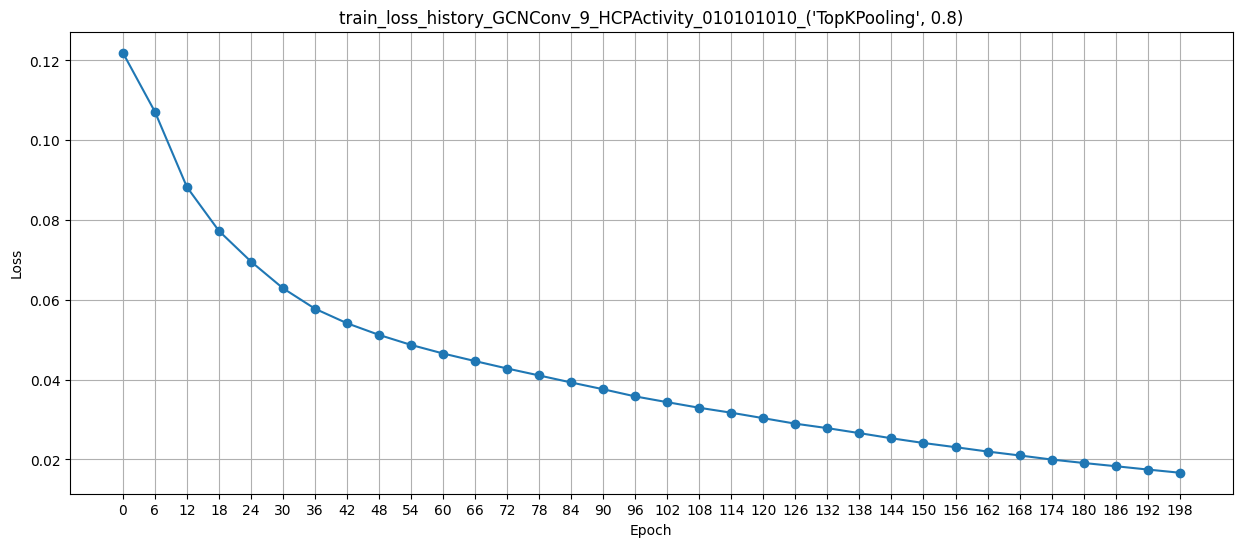

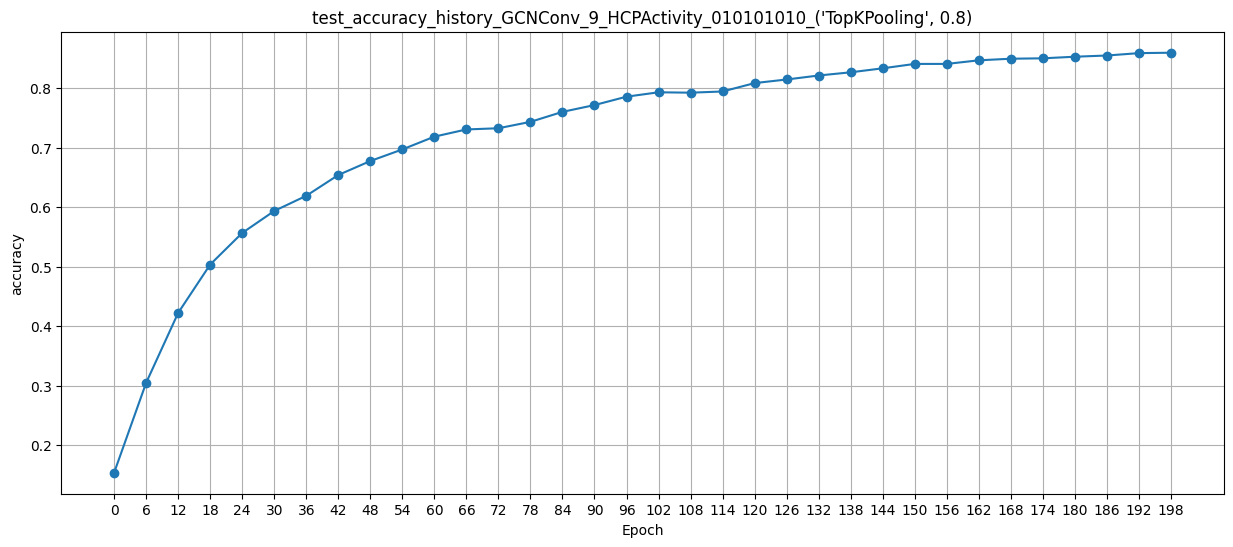

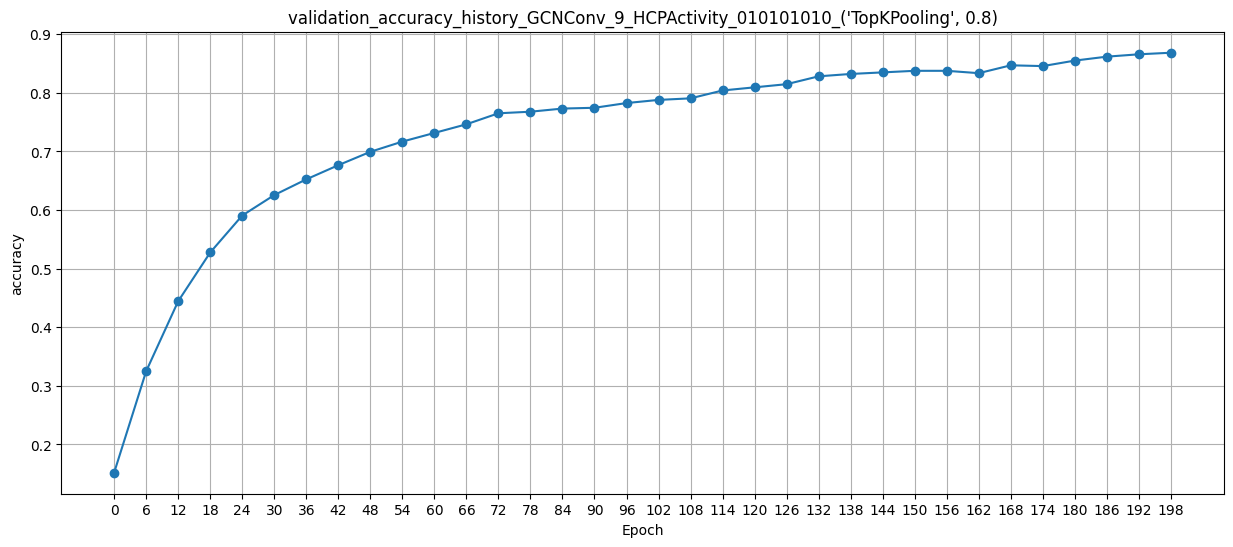

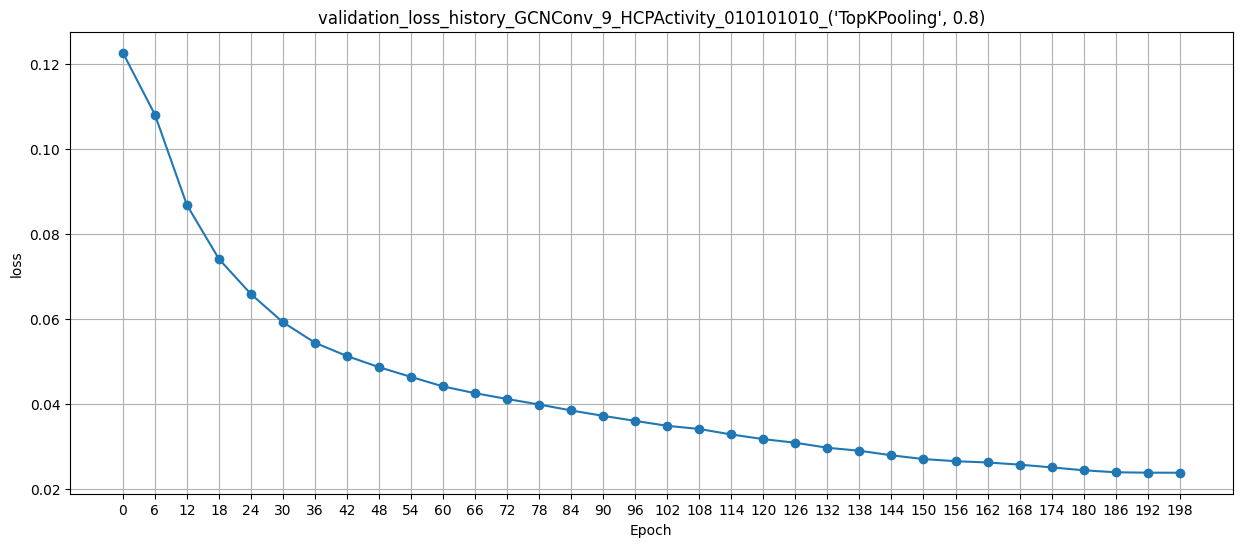

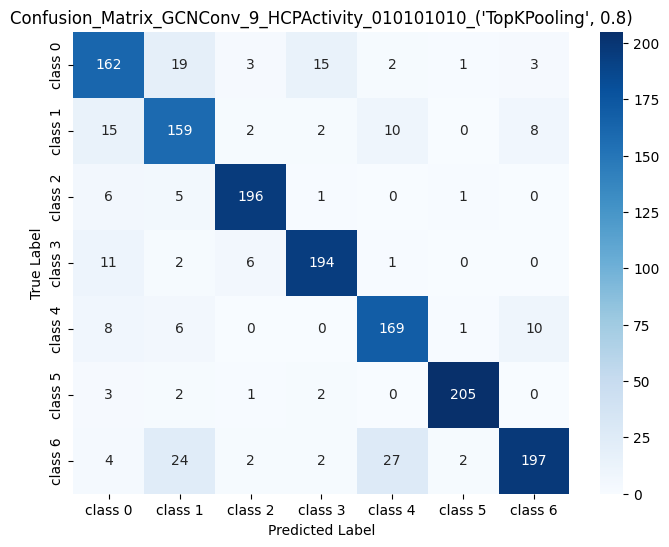

Directory '/content/drive/MyDrive/shayan/thesis_project/results/results_each_model/GCNConv_9_HCPActivity_010101010_('TopKPooling', 0.5)' created successfully.
<class 'torch_geometric.nn.conv.gcn_conv.GCNConv'>
0.5
<class 'torch_geometric.nn.pool.topk_pool.TopKPooling'> type(pooling)-------------------------
400 train_dataset ------------
GNNs(
  (convs): ModuleList(
    (0): GCNConv(400, 32)
    (1): GCNConv(32, 32)
    (2): TopKPooling(32, ratio=0.5, multiplier=1.0)
    (3-4): 2 x GCNConv(32, 32)
    (5): TopKPooling(32, ratio=0.5, multiplier=1.0)
    (6-7): 2 x GCNConv(32, 32)
    (8): TopKPooling(32, ratio=0.5, multiplier=1.0)
    (9-10): 2 x GCNConv(32, 32)
    (11): TopKPooling(32, ratio=0.5, multiplier=1.0)
    (12): GCNConv(32, 32)
  )
  (aggr): MeanAggregation()
  (bnh): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (mlp): Sequential(
    (0): Linear(in_f

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 0, loss: 0.121919, val_acc:0.15, test_acc:0.15, f1_score:0.25, precision:0.97, recall:0.15


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 1, loss: 0.120561, val_acc:0.2, test_acc:0.19, f1_score:0.27, precision:0.81, recall:0.18


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 2, loss: 0.11659, val_acc:0.29, test_acc:0.27, f1_score:0.33, precision:0.79, recall:0.24


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 3, loss: 0.111748, val_acc:0.33, test_acc:0.31, f1_score:0.39, precision:0.75, recall:0.3


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 4, loss: 0.107654, val_acc:0.36, test_acc:0.35, f1_score:0.41, precision:0.63, recall:0.34


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 5, loss: 0.104495, val_acc:0.37, test_acc:0.35, f1_score:0.43, precision:0.57, recall:0.34


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 6, loss: 0.102377, val_acc:0.36, test_acc:0.36, f1_score:0.45, precision:0.64, recall:0.35


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 7, loss: 0.100727, val_acc:0.37, test_acc:0.35, f1_score:0.46, precision:0.7, recall:0.36


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 8, loss: 0.099307, val_acc:0.37, test_acc:0.35, f1_score:0.47, precision:0.72, recall:0.36
epoch: 9, loss: 0.098059, val_acc:0.39, test_acc:0.37, f1_score:0.47, precision:0.73, recall:0.37


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch: 10, loss: 0.096466, val_acc:0.41, test_acc:0.38, f1_score:0.48, precision:0.72, recall:0.38
epoch: 11, loss: 0.09441, val_acc:0.42, test_acc:0.41, f1_score:0.48, precision:0.7, recall:0.4
epoch: 12, loss: 0.091772, val_acc:0.44, test_acc:0.43, f1_score:0.5, precision:0.68, recall:0.42
epoch: 13, loss: 0.088841, val_acc:0.48, test_acc:0.46, f1_score:0.51, precision:0.66, recall:0.44
epoch: 14, loss: 0.085343, val_acc:0.5, test_acc:0.48, f1_score:0.53, precision:0.66, recall:0.46
epoch: 15, loss: 0.082373, val_acc:0.52, test_acc:0.49, f1_score:0.55, precision:0.66, recall:0.49
epoch: 16, loss: 0.079903, val_acc:0.53, test_acc:0.52, f1_score:0.56, precision:0.65, recall:0.51
epoch: 17, loss: 0.07762, val_acc:0.55, test_acc:0.53, f1_score:0.57, precision:0.65, recall:0.52
epoch: 18, loss: 0.075783, val_acc:0.56, test_acc:0.54, f1_score:0.57, precision:0.64, recall:0.53
epoch: 19, loss: 0.074056, val_acc:0.57, test_acc:0.55, f1_score:0.58, precision:0.64, recall:0.54
epoch: 20, loss:

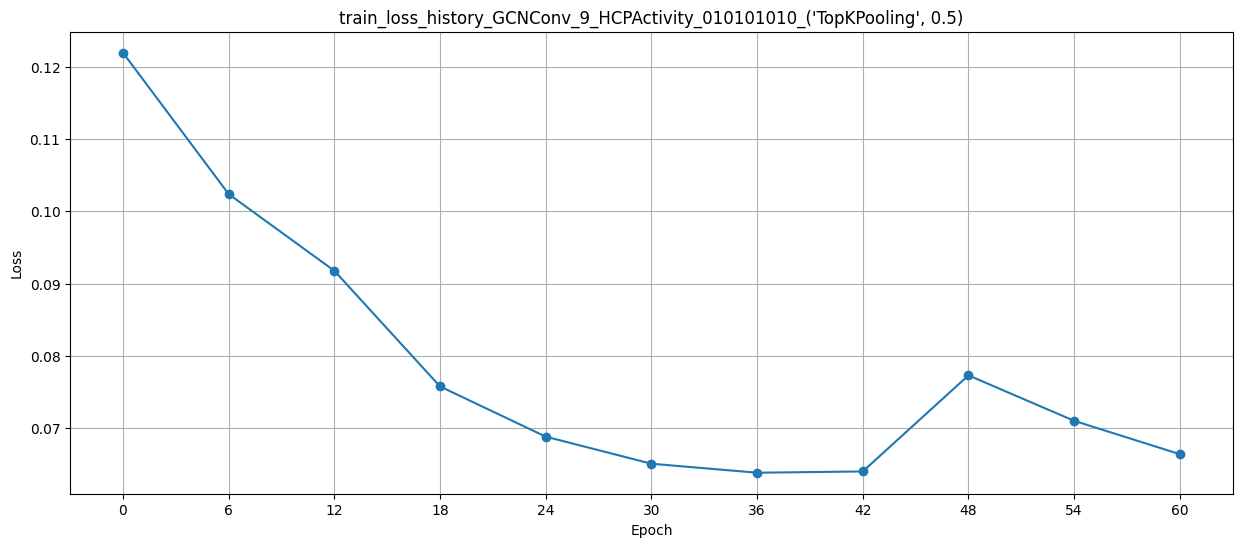

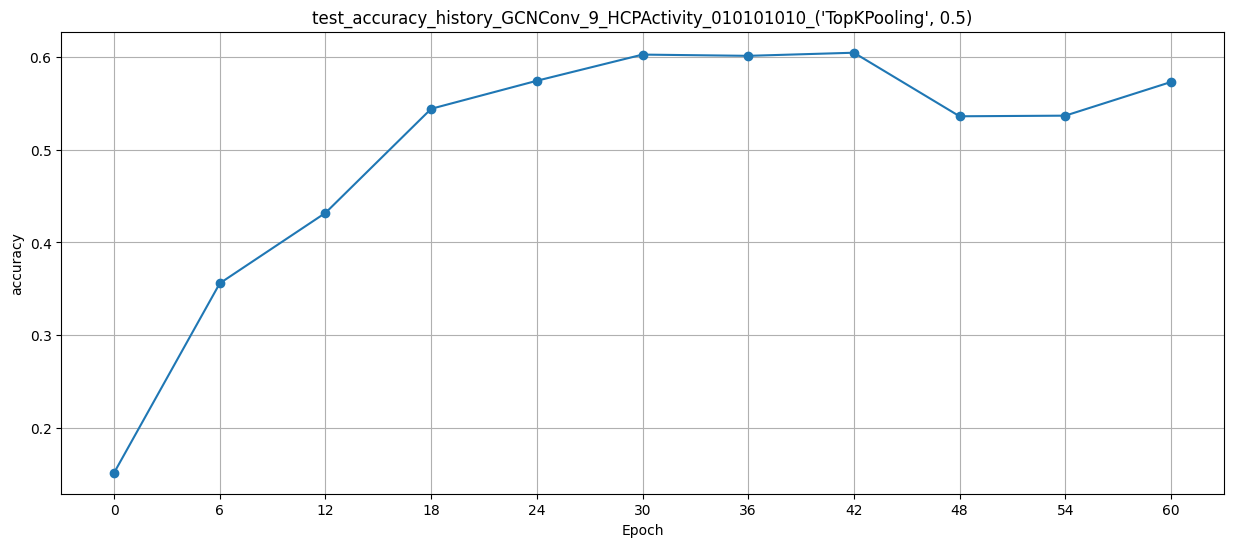

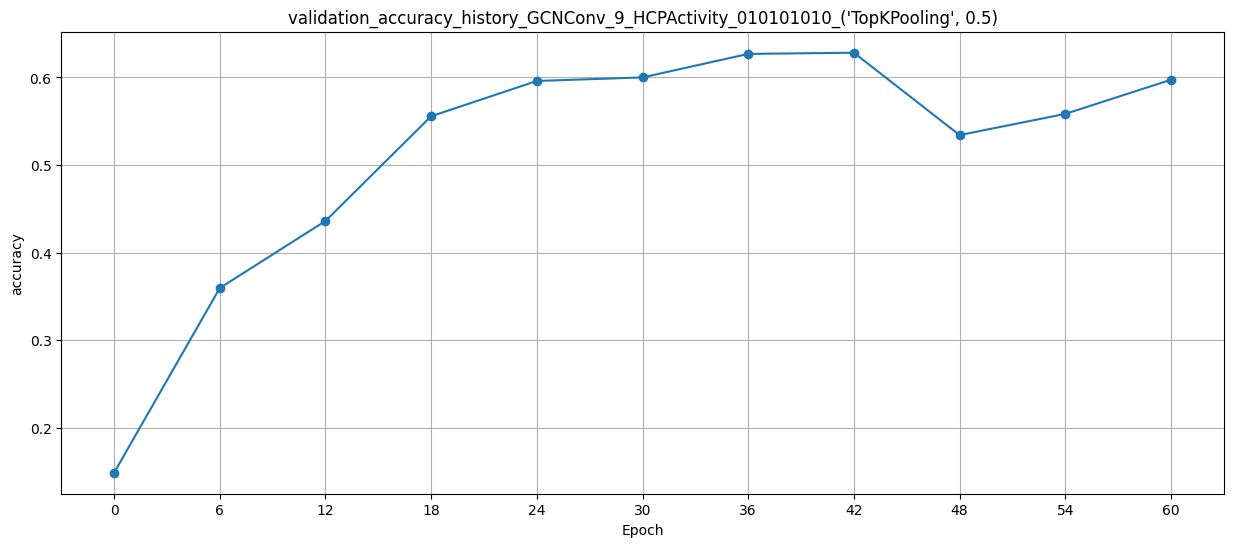

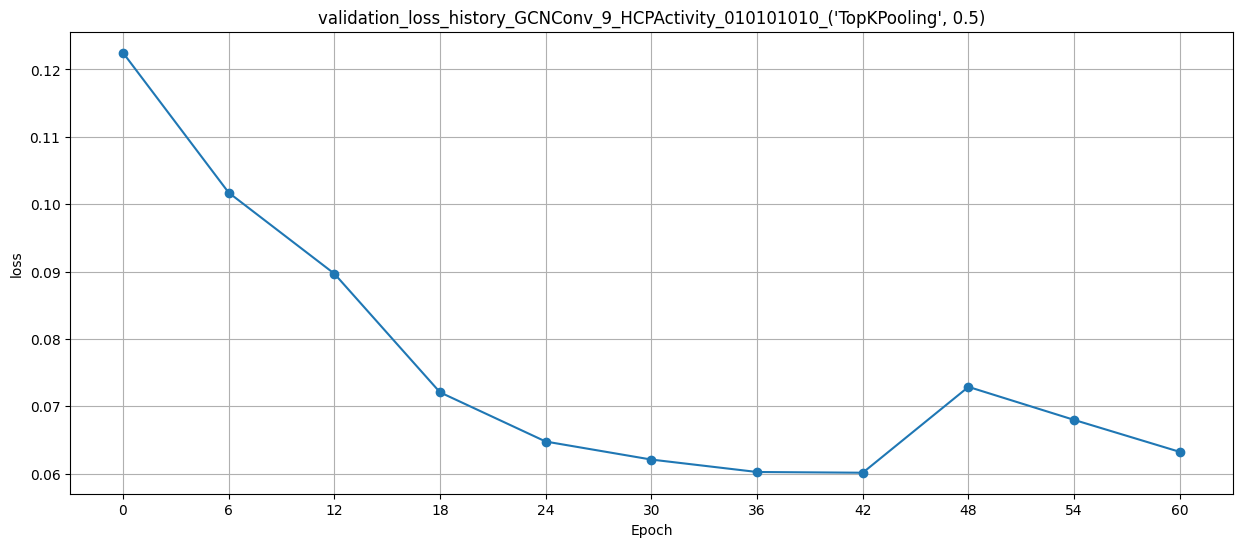

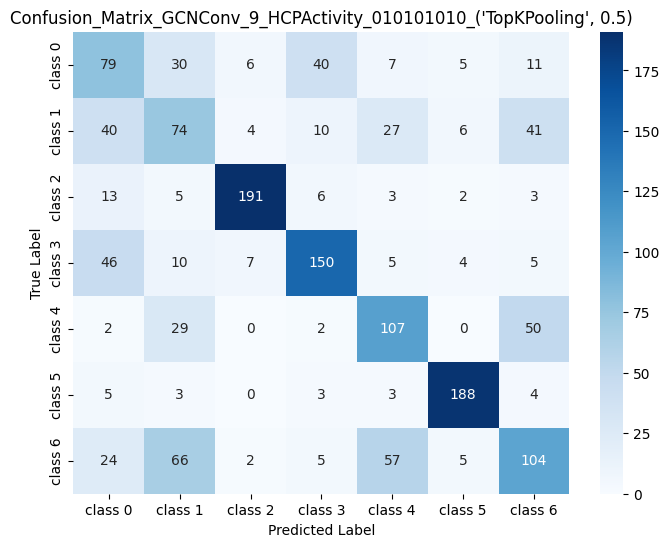

In [ ]:
for model_type in model_type_list:
  for i in range(len(num_layer_list)):
    flag_repeated = False
    for pooling_code in pooling_code_list[i]:
      for pooling_type in pooling_type_list:

        if flag_repeated and '1' not in pooling_code:
          continue
        if '1' not in pooling_code:
          flag_repeated = True


        # early_stopper = EarlyStopping(patience=20, verbose=False)

        val_acc_history, test_acc_history, test_loss_history, train_loss_history, val_loss_history = [],[],[],[],[]

        directory_path = '/content/drive/MyDrive/shayan/thesis_project/results/results_each_model/'
        title = model_type + '_' + str(num_layer_list[i]) + '_' + args.dataset + '_' + pooling_code + '_' + str(pooling_type)
        directory_path += title


        # Check if the directory already exists
        if not os.path.exists(directory_path):
            # Create the directory
            os.makedirs(directory_path)
            print(f"Directory '{directory_path}' created successfully.")
        else:
            print(f"Directory '{directory_path}' already exists.")

        directory_path += '/'



        index = 0
        start = time.time()
        torch.manual_seed(seeds[index])
        if torch.cuda.is_available():
            torch.cuda.manual_seed(seeds[index])
        random.seed(seeds[index])
        np.random.seed(seeds[index])
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False



        # pooling extraction
        gnn = eval(model_type)
        print(gnn)
        ratio = 1
        if type(pooling_type) == tuple:
          pooling_str = pooling_type[0]
          pooling = eval(pooling_type[0])
          ratio = pooling_type[1]
        else:
          pooling = eval(pooling_type)
          pooling_str = pooling_type

        print(ratio)

        # Setting model
        args.model = model_type


        model = GNNs(args,train_dataset, args.hidden, args.hidden_mlp, num_layer_list[i], pooling_code, pooling, gnn, ratio, pooling_str).to(args.device) ## apply GNN*
        print(model)

        total_params = sum(p.numel() for p in model.parameters())
        print(f"Total number of parameters is: {total_params}")
        # model.reset_parameters()
        optimizer = Adam(model.parameters(), lr=args.lr, weight_decay=args.weight_decay)
        loss, test_acc = [],[]
        best_val_acc = 0.0



        #early stopping
        best_val_loss = float('inf')
        epochs_without_improvement = 0
        early_stopping_patience = 25




        args.epochs = 200

        for epoch in range(args.epochs):

          loss, precision, recall, f1_score1, mat_conf1  = train(train_loader)
          val_loss, val_acc, _, _, _, _ = test(val_loader)
          test_loss, test_acc, _, _, _, _ = test(test_loader)
          # f1_score1 = f1(target_label, output_label)
          # f1_score1 = 0
          print("epoch: {}, loss: {}, val_acc:{}, test_acc:{}, f1_score:{}, precision:{}, recall:{}".format(epoch, np.round(loss.item(),6), np.round(val_acc,2),np.round(test_acc,2),
                                                                                                            np.round(f1_score1,2), np.round(precision,2), np.round(recall,2)))
          val_acc_history.append(val_acc)
          train_loss_history.append(loss.item())
          test_acc_history.append(test_acc)
          val_loss_history.append(val_loss.item())

          if val_acc > best_val_acc:
            best_val_acc = val_acc
          #     # print(directory_path+ '/' +'task-checkpoint-best-acc.pkl')
          #     torch.save(model.state_dict(), directory_path+ title +'task-checkpoint-best-acc.pkl')
          #     # if epoch> int(args.epochs/2):

          #     #     torch.save(model.state_dict(), directory_path+ '/' +'task-checkpoint-best-acc.pkl')
          #     #     print(directory_path+ '/' +'task-checkpoint-best-acc.pkl')



          if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            epochs_without_improvement = 0
            torch.save(model.state_dict(), directory_path+ title +'task-checkpoint-best-acc.pkl')  # Save the best model
          else:
            epochs_without_improvement += 1
            print(f'EarlyStopping counter: {epochs_without_improvement} out of {early_stopping_patience}')
            if epochs_without_improvement > early_stopping_patience:
              print("Early stopping triggered at epoch: {}".format(epoch))
              break


        # plot_and_save(train_loss_history, val_acc_history, test_acc_history, val_loss_history, title, directory_path)



        model.load_state_dict(torch.load(directory_path+ title +'task-checkpoint-best-acc.pkl'))
        model.eval()
        test_loss, test_acc, test_precision, test_recall, test_f1, test_conf = test(test_loader)

        plot_and_save(args, train_loss_history, val_acc_history, test_acc_history, val_loss_history, test_conf, title, directory_path)

        # test_loss, _, _, _ = train(test_loader)
        test_acc_history.append(test_acc)
        test_loss_history.append(test_loss)

        with open(file_path_csv, 'a', newline='') as csvfile:
          # Create a CSV writer object
          csv_writer = csv.writer(csvfile)

          row = [model_type, str(pooling_type), str(num_layer_list[i]), args.dataset,
                   pooling_code, loss.item(), test_precision, test_recall, test_f1, best_val_acc, test_acc, test_loss.item(), best_val_loss, args.hidden]
          csv_writer.writerow(row)




ValueError: x and y must have same first dimension, but have shapes (200,) and (65,)

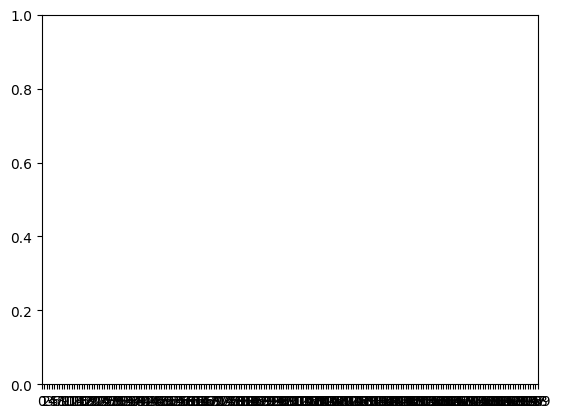

In [ ]:
ypoints = np.array(train_loss_history)
xpoints = np.array([i for i in range(args.epochs)])
plt.xticks(xpoints)
plt.plot(xpoints, ypoints, marker='o', linestyle='-')
plt.title('Sample Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.show()

In [ ]:
#test the model
model.load_state_dict(torch.load(path + args.dataset+args.model+'task-checkpoint-best-acc.pkl'))
model.eval()
test_acc = test(test_loader)
test_loss, _, _, _ = train(test_loader)
test_acc_history.append(test_acc)
test_loss_history.append(test_loss)

In [ ]:









print(test_acc)
print(test_loss)

In [ ]:



0